In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsbombpy import sb
from mplsoccer import Pitch, VerticalPitch

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# collect all cross events 

In [3]:
matches = sb.matches(competition_id=55, season_id=43)
matches = matches[matches['match_status_360'] == 'available']
match_ids = matches.match_id.unique()
match_ids

array([3788753, 3788765, 3795107, 3795221, 3795506, 3794688, 3794692,
       3794686, 3794687, 3794685, 3788774, 3788771, 3788772, 3788768,
       3788767, 3788763, 3788759, 3788758, 3788757, 3788745, 3788746,
       3794691, 3794690, 3794689, 3788769, 3788761, 3788764, 3788766,
       3788754, 3788755, 3788773, 3788762, 3788760, 3788747, 3788741,
       3795220, 3788770, 3795108, 3795187, 3795109, 3788756, 3788749,
       3788750, 3788748, 3788751, 3788752, 3788742, 3788775, 3788776,
       3788743, 3788744])

In [149]:
events.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_other',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_offensive', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'p

In [172]:
# collect all passing events 
cols = ['teammate', 'actor', 'location_x', 'id',
           'player', 'position', 'team', 'type', 'timestamp', 
           'pass_end_location', 'pass_length', 'pass_height',
           'pass_outcome', 'pass_recipient', 'pass_cross', 'interception_outcome',
           'pass_aerial_won', 'pass_technique', 'play_pattern', 'pass_goal_assist']

cross_df = pd.DataFrame(columns=cols)

matches = sb.matches(competition_id=55, season_id=43)
match_ids = matches[matches['match_status_360'] == 'available'].match_id.unique()

for match_id in tqdm(match_ids):
    
    events = sb.events(match_id=match_id)
    match_frames = sb.frames(match_id=match_id, fmt='dataframe')

    # join the events to the frames 
    df = pd.merge(match_frames, events, left_on='id', right_on='id', how='left')
    
    try:
        # take relevant rows 
        df = df[cols]

        # filter for crosses only
        df = df[df['pass_cross'] == True]

        # append to overall df
        cross_df = cross_df.append(df)
    except:
        print('fail')



len(cross_df.id.unique())

  8%|▊         | 4/51 [00:12<02:33,  3.27s/it]

fail


 31%|███▏      | 16/51 [01:09<02:03,  3.54s/it]

fail


 33%|███▎      | 17/51 [01:11<01:53,  3.33s/it]

fail


 51%|█████     | 26/51 [01:44<01:25,  3.44s/it]

fail


 84%|████████▍ | 43/51 [02:42<00:27,  3.50s/it]

fail


 88%|████████▊ | 45/51 [02:48<00:19,  3.27s/it]

fail


100%|██████████| 51/51 [03:09<00:00,  3.71s/it]


887

In [173]:
cross_df.pass_goal_assist.value_counts()

True    473
Name: pass_goal_assist, dtype: int64

In [158]:
cross_df.interception_outcome.unique()

array([nan], dtype=object)

In [159]:
cross_df.pass_aerial_won.value_counts()

True    125
Name: pass_aerial_won, dtype: int64

In [160]:
cross_df.pass_technique.value_counts()

Through Ball    170
Name: pass_technique, dtype: int64

In [170]:
count1 = 0
count2 = 0
for id, row in cross_df.iterrows():
    if row.pass_technique == 'Through Ball' and row.pass_outcome == 'Incomplete':
        count1+=1
    elif row.pass_aerial_won and row.pass_outcome == 'Incomplete':
        count2+=1

count1, count2

(60, 9203)

In [144]:
cross_df.pass_height.value_counts()

High Pass      11027
Ground Pass     2463
Low Pass        2163
Name: pass_height, dtype: int64

majority of passes are made high in the air

In [6]:
cross_df.pass_outcome.value_counts()

Incomplete          9263
Out                  880
Unknown              310
Pass Offside          49
Injury Clearance      21
Name: pass_outcome, dtype: int64

In [7]:
cross_df.head()

,teammate,actor,location_x,id,player,position,team,type,timestamp,pass_end_location,pass_length,pass_height,pass_outcome,pass_recipient,pass_cross
1705,True,False,"[83.92959, 10.46831]",be4fe0c8-657b-44e5-aaeb-6f40aa244c23,"Daniel O""Shaughnessy",Left Center Back,Finland,Pass,00:02:23.674,"[104.1, 30.2]",27.434467,High Pass,Incomplete,Teemu Pukki,True
1706,True,False,"[87.65039, 17.39273]",be4fe0c8-657b-44e5-aaeb-6f40aa244c23,"Daniel O""Shaughnessy",Left Center Back,Finland,Pass,00:02:23.674,"[104.1, 30.2]",27.434467,High Pass,Incomplete,Teemu Pukki,True
1707,False,False,"[88.3027, 6.261185]",be4fe0c8-657b-44e5-aaeb-6f40aa244c23,"Daniel O""Shaughnessy",Left Center Back,Finland,Pass,00:02:23.674,"[104.1, 30.2]",27.434467,High Pass,Incomplete,Teemu Pukki,True
1708,False,False,"[89.11674, 13.76878]",be4fe0c8-657b-44e5-aaeb-6f40aa244c23,"Daniel O""Shaughnessy",Left Center Back,Finland,Pass,00:02:23.674,"[104.1, 30.2]",27.434467,High Pass,Incomplete,Teemu Pukki,True
1709,True,False,"[89.41762, 2.43725]",be4fe0c8-657b-44e5-aaeb-6f40aa244c23,"Daniel O""Shaughnessy",Left Center Back,Finland,Pass,00:02:23.674,"[104.1, 30.2]",27.434467,High Pass,Incomplete,Teemu Pukki,True


In [66]:
data_freeze_frame = pd.DataFrame()
outcomes = []
locations = []
end_locations = []
lengths = []
heights = []
freeze_frames=  []

for i in cross_df.id.unique():
    df = cross_df[cross_df['id'] == i]
    
    frame = []
    for id,row in df.iterrows():
        if row.actor == True:
            outcomes.append(row.pass_outcome)
            locations.append(row.location_x)
            end_locations.append(row.pass_end_location)
            lengths.append(row.pass_length)
            heights.append(row.pass_height)
        else:
            freeze_frame = {}
            freeze_frame['location'] = row.location_x
            freeze_frame['player'] = {'name': row.player}
            freeze_frame['position'] = {'name': row.position}
            freeze_frame['teammate'] = row.teammate
            frame.append(freeze_frame)
    freeze_frames.append(frame)
        
data_freeze_frame['location'] = locations
data_freeze_frame['pass_end_location'] = end_locations
data_freeze_frame['pass_length'] = lengths
data_freeze_frame['pass_height'] = heights
data_freeze_frame['freeze_frame'] = freeze_frames
data_freeze_frame['outcome'] = outcomes
data_freeze_frame.head()

,location,pass_end_location,pass_length,pass_height,freeze_frame,outcome
0,"[89.84301, 4.3097]","[104.1, 30.2]",27.434467,High Pass,"[{'location': [83.92959, 10.46831], 'player': ...",Incomplete
1,"[101.844124, 68.46735]","[110.8, 42.9]",30.696090,High Pass,"[{'location': [66.642944, 18.947556], 'player'...",Pass Offside
2,"[84.493904, 72.657875]","[104.5, 41.8]",36.170708,High Pass,"[{'location': [75.08397, 31.858883], 'player':...",Incomplete
3,"[89.92356, 68.6189]","[110.7, 36.0]",37.438618,High Pass,"[{'location': [71.402954, 54.103832], 'player'...",NaN
4,"[101.89212, 17.499557]","[110.7, 32.0]",17.266151,Low Pass,"[{'location': [79.84635, 49.374546], 'player':...",NaN


In [5]:
# def encode_players(df):
#     coding = []
#     for id, row in df.iterrows():
#         if row.teammate == True and row.actor == True:
#             coding.append('A')
#         elif row.teammate == False:
#             coding.append('O')
#         elif row.teammate == True and row.actor == False:
#             coding.append('TM')
#         else:
#             coding.append('X')

#     df['mapping'] = coding
#     df = df[df['mapping'] != 'X']
    
#     return df

In [67]:
# cross_df = encode_players(cross_df)

data_freeze_frame[['loc_x', 'loc_y']] = data_freeze_frame['location'].apply(pd.Series)
data_freeze_frame[['cross_end_loc_x', 'cross_end_loc_y']] = data_freeze_frame['pass_end_location'].apply(pd.Series)
data_freeze_frame = data_freeze_frame[['loc_x', 'loc_y', 'cross_end_loc_x', 'cross_end_loc_y', 'pass_length', 'pass_height', 'freeze_frame', 'outcome']]

In [68]:
data_freeze_frame.head()

,loc_x,loc_y,cross_end_loc_x,cross_end_loc_y,pass_length,pass_height,freeze_frame,outcome
0,89.843010,4.309700,104.1,30.2,27.434467,High Pass,"[{'location': [83.92959, 10.46831], 'player': ...",Incomplete
1,101.844124,68.467350,110.8,42.9,30.696090,High Pass,"[{'location': [66.642944, 18.947556], 'player'...",Pass Offside
2,84.493904,72.657875,104.5,41.8,36.170708,High Pass,"[{'location': [75.08397, 31.858883], 'player':...",Incomplete
3,89.923560,68.618900,110.7,36.0,37.438618,High Pass,"[{'location': [71.402954, 54.103832], 'player'...",NaN
4,101.892120,17.499557,110.7,32.0,17.266151,Low Pass,"[{'location': [79.84635, 49.374546], 'player':...",NaN


# find transition probabilities 

In [33]:
# cross_prob_df = cross_df[cross_df['mapping'] == 'A']

for simplicity, just make 3 sections in box, top of box and far side (5 sections total)

In [69]:
def section(x,y):
    if (x <= 60 and y <= 18) or (x >= 60 and y >= 62):
        return 'RF'
    elif (x <= 60 and y >= 62) or (x >= 60 and y <= 18):
        return 'LF'
    elif (x <= 18 and 18 <= y <= 30) or (x >= 102 and 50 <= y <= 62):
        return 'RB'
    elif (x <= 18 and 30 <= y <= 50) or (x >= 102 and 30 <= y <= 50):
        return 'MB'
    elif (x <= 18 and 50 <= y <= 62) or (x >= 102 and 18 <= y <= 30):
        return 'LB'
    elif (18 <= x <= 60 and 18 <= y <= 62) or (60 <= x <= 102 and 18 <= y <= 62):
        return 'TOB'

In [70]:
mapping = {'RF': 0,
          'LF': 1,
          'RB': 2,
          'MB': 3,
          'LB': 4,
          'TOB': 5}

In [71]:
counts = [[0]*6, [0]*6, [0]*6, [0]*6, [0]*6, [0]*6]

In [72]:
for id, row in data_freeze_frame.iterrows():
    # cross section 
    cross_section = section(row.loc_x, row.loc_y)

    # end section 
    end_section = section(row.cross_end_loc_x, row.cross_end_loc_y)

    i = mapping[cross_section]
    j = mapping[end_section]
    counts[i][j] = counts[i][j] + 1
    
# del counts[4:6]

In [73]:
counts

[[0, 25, 2, 318, 34, 2],
 [26, 0, 38, 264, 0, 3],
 [0, 6, 2, 107, 5, 1],
 [0, 0, 0, 1, 0, 0],
 [4, 0, 6, 113, 0, 3],
 [3, 1, 4, 42, 6, 0]]

In [74]:
# transition matrix
p = [[0]*6, [0]*6, [0]*6, [0]*6, [0]*6, [0]*6]

for i in range(len(counts)):
    for j in range(len(counts)):
        p[i][j] = round(counts[i][j] / sum(counts[i]),4)

p

[[0.0, 0.0656, 0.0052, 0.8346, 0.0892, 0.0052],
 [0.0785, 0.0, 0.1148, 0.7976, 0.0, 0.0091],
 [0.0, 0.0496, 0.0165, 0.8843, 0.0413, 0.0083],
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0317, 0.0, 0.0476, 0.8968, 0.0, 0.0238],
 [0.0536, 0.0179, 0.0714, 0.75, 0.1071, 0.0]]

In [40]:
# probability of n opponents in dest zone 
# Prob that a cross has been successful with n opponenets in that zone 

In [41]:
# crosses are often to space in hopes that a teammate will move to the ball 
# find ratio or fraction of players in the zone wrt to what team they are on 

In [42]:
# prob that a teammate will get it is #teammates/#players_total  in that section

In [75]:
data_freeze_frame.head()

,loc_x,loc_y,cross_end_loc_x,cross_end_loc_y,pass_length,pass_height,freeze_frame,outcome
0,89.843010,4.309700,104.1,30.2,27.434467,High Pass,"[{'location': [83.92959, 10.46831], 'player': ...",Incomplete
1,101.844124,68.467350,110.8,42.9,30.696090,High Pass,"[{'location': [66.642944, 18.947556], 'player'...",Pass Offside
2,84.493904,72.657875,104.5,41.8,36.170708,High Pass,"[{'location': [75.08397, 31.858883], 'player':...",Incomplete
3,89.923560,68.618900,110.7,36.0,37.438618,High Pass,"[{'location': [71.402954, 54.103832], 'player'...",NaN
4,101.892120,17.499557,110.7,32.0,17.266151,Low Pass,"[{'location': [79.84635, 49.374546], 'player':...",NaN


In [44]:
# sections = []
# for id, row in cross_df.iterrows(): sections.append(section(row.loc_x, row.loc_y))
# new_cross_df = cross_df
# new_cross_df['section'] = sections
# new_cross_df

In [76]:
pass_height_mapping = {'High Pass': 0,
                'Ground Pass': 1,
                'Low Pass': 2 }

In [77]:
outcomes = []
origin_sections = []
destination_sections = []
opp_in_dest = []
tm_in_dest = []
pressures = []
pass_heights = []

for id, row in data_freeze_frame.iterrows():
    if row.outcome in ['Incomplete', 'Out']: outcomes.append(0)
    else: outcomes.append(1)
       
    cross_x = row.loc_x
    cross_y = row.loc_y
    
    destination = section(row.cross_end_loc_x, row.cross_end_loc_y)

    origin_sections.append(mapping[section(cross_x, cross_y)])
    destination_sections.append(mapping[destination])
    pass_heights.append(pass_height_mapping[row.pass_height])
    
    
    
    opp_count = 0
    tm_count = 0
    pressure = 0
    
    for player in row.freeze_frame:
        player_x = player['location'][0]
        player_y = player['location'][1]
        
        #count how many opponents are within 3 yards of player making the cross
        if ((cross_x - player_x)**2 + (cross_y - player_y)**2) <= 3**2 and (player['teammate'] == False) and (player['position']['name'] != 'Goalkeeper'):
            pressure += 1
        
        if player['teammate'] == True:
            if section(player_x, player_y) == destination:
                tm_count+=1
        else:
            if section(player_x, player_y) == destination:
                opp_count+=1
                
    opp_in_dest.append(opp_count)
    tm_in_dest.append(tm_count)
    pressures.append(pressure)
            
    
data_freeze_frame['outcome'] = outcomes
data_freeze_frame['cross_origin'] = origin_sections
data_freeze_frame['cross_dest'] = destination_sections
data_freeze_frame['zone_pressure'] = opp_in_dest # num opp in dest zone
data_freeze_frame['zone_support'] = tm_in_dest # num teammates in dest zone 
data_freeze_frame['cross_pressure'] = pressures # num of opp on crosser
data_freeze_frame['cross_height'] = pass_heights


In [98]:
data = data_freeze_frame[['loc_x', 'loc_y', 'cross_dest', 'zone_pressure', 'zone_support', 'pass_length', 'cross_height', 'cross_pressure', 'outcome']]

data.head()

,loc_x,loc_y,cross_dest,zone_pressure,zone_support,pass_length,cross_height,cross_pressure,outcome
0,89.843010,4.309700,3,1,0,27.434467,0,2,0
1,101.844124,68.467350,3,3,1,30.696090,0,0,1
2,84.493904,72.657875,3,3,1,36.170708,0,0,0
3,89.923560,68.618900,3,4,2,37.438618,0,0,1
4,101.892120,17.499557,3,5,3,17.266151,2,0,1


In [321]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, accuracy_score

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import seaborn as sns
from sklearn.metrics import confusion_matrix

X = data[['loc_y', 'cross_dest', 'zone_pressure', 'zone_support','cross_pressure']]
y = data['outcome']

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=45,stratify=y)


In [322]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(train_X, train_y)

print(f"Training target statistics: {Counter(y_res)}")



Training target statistics: Counter({1: 531, 0: 531})


In [323]:
model = LogisticRegression()
model.fit(X_res, y_res)
y_pred = model.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.6225490196078431


In [324]:
for cof in model.coef_[0]:
    print(cof)

-6.161075185423454e-05
-0.13864884262261676
-0.1412220171495498
0.19667478367257762
-0.02627764046468265


<AxesSubplot:>

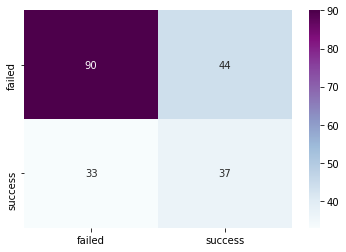

In [325]:
cm=confusion_matrix(test_y, y_pred)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d', xticklabels=['failed', 'success'], yticklabels=['failed', 'success'])

In [326]:
print('******** LR **********')
print('Precision Score: ',precision_score(test_y,y_pred))
print('Recall Score: ',recall_score(test_y,y_pred))
print('Accuracy Score: ',accuracy_score(test_y,y_pred))
print('********************************************')

******** LR **********
Precision Score:  0.4567901234567901
Recall Score:  0.5285714285714286
Accuracy Score:  0.6225490196078431
********************************************


In [348]:

modelCV = LogisticRegressionCV(Cs=2, fit_intercept=True, scoring=None, solver='sag', tol=0.0001, 
                                          max_iter=100, class_weight=None)

modelCV.fit(X_res, y_res)
y_pred = modelCV.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print('******** LR **********')
print('Precision Score: ',precision_score(test_y,y_pred))
print('Recall Score: ',recall_score(test_y,y_pred))
print('Accuracy Score: ',accuracy_score(test_y,y_pred))
print('********************************************')

******** LR **********
Precision Score:  0.44047619047619047
Recall Score:  0.5285714285714286
Accuracy Score:  0.6078431372549019
********************************************


In [350]:
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import NearMiss
undersample = NearMiss()

X_under, y_under = undersample.fit_resample(train_X, train_y)
Counter(yu)

Counter({0: 281, 1: 281})

In [351]:

modelCV = LogisticRegressionCV(Cs=2, fit_intercept=True, scoring=None, solver='sag', tol=0.0001, 
                                          max_iter=100, class_weight=None)

modelCV.fit(X_under, y_under)
y_pred = modelCV.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print('******** LR **********')
print('Precision Score: ',precision_score(test_y,y_pred))
print('Recall Score: ',recall_score(test_y,y_pred))
print('Accuracy Score: ',accuracy_score(test_y,y_pred))
print('********************************************')

******** LR **********
Precision Score:  0.4838709677419355
Recall Score:  0.6428571428571429
Accuracy Score:  0.6421568627450981
********************************************


<AxesSubplot:>

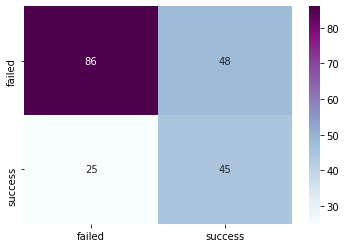

In [352]:
cm=confusion_matrix(test_y, y_pred)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d', xticklabels=['failed', 'success'], yticklabels=['failed', 'success'])

undersampling is more accurate than oversampling 